## 01 - Problem (case study)

#### Data Description :
This data set is of an auto insurance company, which gives idea about the offered policies against different types of vachiles by type and size. Also it has an information about the customer's profile like gender, education, emplyment status,etc.

#### Goal :
Goal is to predict the total claim amount against the given auto insurance data.

## 02 - Getting Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.duplicated().sum()

0

## 03 - Cleaning/Wrangling/EDA

 - **Change headers names.**

In [7]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]

In [9]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

 - **Deal with NaN values.**

In [10]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
df.isna().sum().sum()

0

**There are no NaN values present in the dataset.**

In [12]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
# Dropping the columns which are less relevant 
df = df.drop(['customer','effective_to_date'],axis = 1)
df.head(2)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


- **Categorical Features.**

In [14]:
cat_features = df[df.select_dtypes('object').columns]
cat_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
cat_features.shape

(9134, 14)

 - There are total 14 object columns

 - **Numerical Features.**

In [16]:
num_features = df[df.select_dtypes('number').columns]
num_features

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


 - There are total 8 numerical columns

 - **Exploration.**

Text(0.5, 1.0, 'Total number of responses')

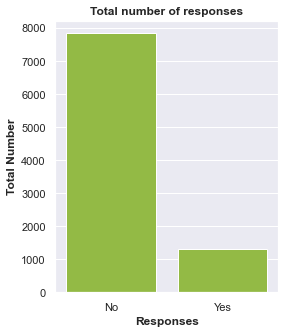

In [17]:
# plot of the total number of responses

a = df['response'].value_counts()
plt.figure(figsize = (4,5))
sns.set(style='darkgrid')
plot1 = sns.barplot(data = df, x = a.index, y= a,color="yellowgreen")
plt.xlabel("Responses", weight = 'bold',size = 12)
plt.ylabel("Total Number", weight = 'bold',size = 12)
plt.title("Total number of responses",weight = 'bold',size = 12)

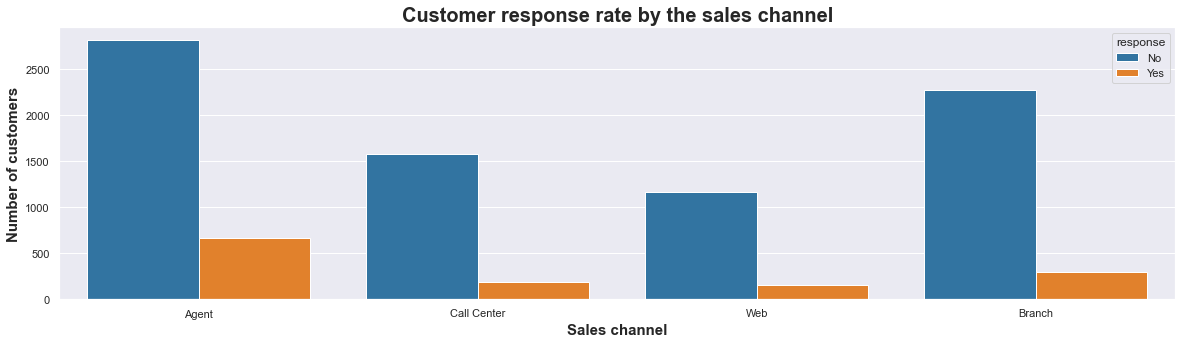

In [18]:
# Customer response rate by the sales channel

plt.figure(figsize=(20, 5))
sns.set(style='darkgrid')
color = ['green','red']
plot2 = sns.countplot(data = df,x='sales_channel', hue = 'response', palette='tab10')
plt.title('Customer response rate by the sales channel',weight='bold',size = 20)
plt.xlabel('Sales channel', weight='bold',size = 15)
plt.ylabel('Number of customers', weight='bold',size = 15)
plt.show()

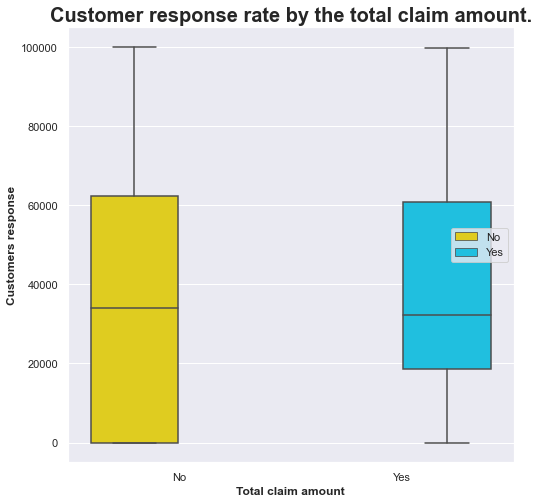

In [19]:
# plot of the response rate by income
plt.figure(figsize=(8,8))
plot5 = sns.boxplot(data=df, y = 'income', x = 'response', hue = 'response',palette='jet_r')
plt.title('Customer response rate by the total claim amount.', weight ='bold',fontsize = 20)
plt.xlabel('Total claim amount', weight='bold',fontsize = 12)
plt.ylabel('Customers response', weight='bold',fontsize = 12)
plt.legend(markerscale=2)

In [20]:
a = round(df.corr(),2)
a

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


## 04 - Processing Data

 - **Dealing with outliers.**

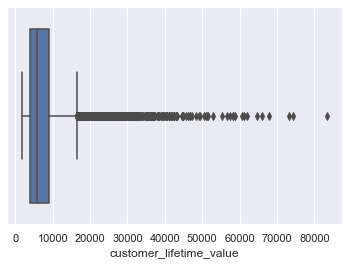

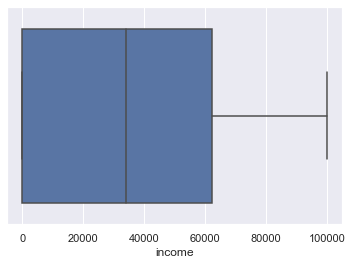

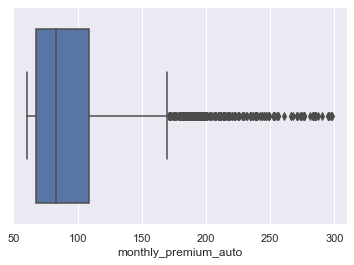

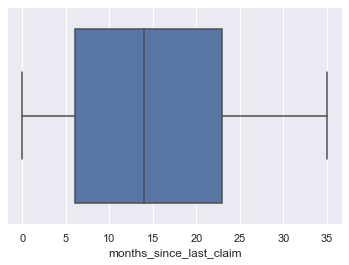

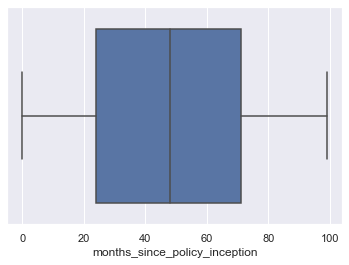

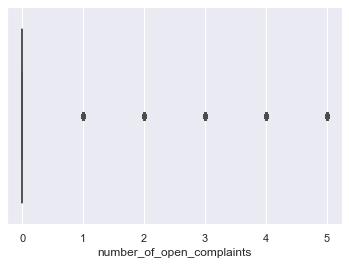

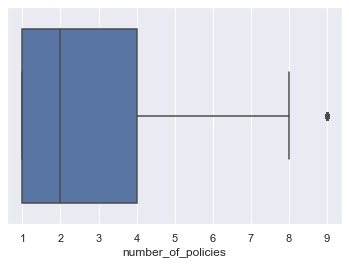

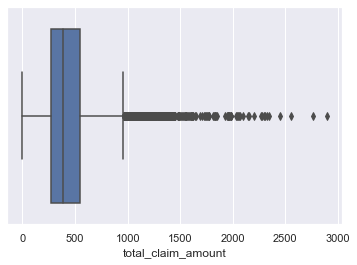

In [21]:
for column in num_features.columns:
    sns.boxplot(num_features[column])  # takes to see the distribution
    plt.show()

In [22]:
df.shape

(9134, 22)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [24]:
# setting limits for customer_lifetime_value column
up_lmt1 = np.percentile(df['customer_lifetime_value'],75)
low_lmt1 = np.percentile(df['customer_lifetime_value'],25)
iqr1 = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25)

print('Upper limit for customer_lifetime_value is : ',up_lmt1)
print('Lower limit for customer_lifetime_value is : ',low_lmt1)
print('IQR for customer_lifetime_value is : ',iqr1)

Upper limit for customer_lifetime_value is :  8962.16704125
Lower limit for customer_lifetime_value is :  3994.25179425
IQR for customer_lifetime_value is :  4967.915247000001


In [25]:
# setting new limits for customer_lifetime_value column
up_lmt1_1 = np.percentile(df['customer_lifetime_value'],75) + 1.5*iqr1
low_lmt1_1 = np.percentile(df['customer_lifetime_value'],25) - 1.5*iqr1
iqr1_new = up_lmt1_1 - low_lmt1_1
print('Upper limit for customer_lifetime_value is : ',up_lmt1_1)
print('Lower limit for customer_lifetime_value is : ',low_lmt1_1)
print('New IQR for customer_lifetime_value is : ',iqr1_new)

Upper limit for customer_lifetime_value is :  16414.039911750002
Lower limit for customer_lifetime_value is :  -3457.6210762500014
New IQR for customer_lifetime_value is :  19871.660988000003


In [30]:
# applying new limits to customer_lifetime_value column
df['customer_lifetime_value'] = np.where(df['customer_lifetime_value'] > up_lmt1_1,up_lmt1_1,np.where(df['customer_lifetime_value']<low_lmt1_1,low_lmt1_1,df['customer_lifetime_value']))

<AxesSubplot:xlabel='customer_lifetime_value'>

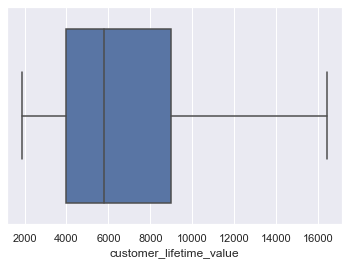

In [27]:
sns.boxplot(x=df['customer_lifetime_value'])

In [28]:
# setting limits for monthly_premium_auto column
up_lmt2 = np.percentile(df['monthly_premium_auto'],75)
low_lmt2 = np.percentile(df['monthly_premium_auto'],25)
iqr2 = np.percentile(df['monthly_premium_auto'],75) - np.percentile(df['monthly_premium_auto'],25)

print('Upper limit for monthly_premium_auto is : ',up_lmt2)
print('Lower limit for monthly_premium_auto is : ',low_lmt2)
print('IQR for monthly_premium_auto is : ',iqr2)

Upper limit for monthly_premium_auto is :  109.0
Lower limit for monthly_premium_auto is :  68.0
IQR for monthly_premium_auto is :  41.0


In [29]:
# setting newlimits for monthly_premium_auto column
up_lmt2 = np.percentile(df['monthly_premium_auto'],75) + 1.5*iqr2
low_lmt2 = np.percentile(df['monthly_premium_auto'],25) - 1.5*iqr2
iqr2_new = up_lmt2 - low_lmt2
print('Upper limit for monthly_premium_auto is : ',up_lmt2)
print('Lower limit for monthly_premium_auto is : ',low_lmt2)
print('New IQR for monthly_premium_auto is : ',iqr2_new)

Upper limit for monthly_premium_auto is :  170.5
Lower limit for monthly_premium_auto is :  6.5
New IQR for monthly_premium_auto is :  164.0


In [31]:
# applying new limits to monthly_premium_auto column
df['monthly_premium_auto'] = np.where(df['monthly_premium_auto'] > up_lmt2,up_lmt2,np.where(df['monthly_premium_auto']<low_lmt2,low_lmt2,df['monthly_premium_auto']))

<AxesSubplot:xlabel='monthly_premium_auto'>

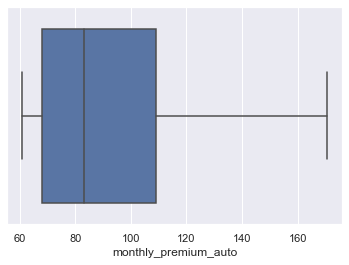

In [32]:
sns.boxplot(x=df['monthly_premium_auto'])

**x-y split**

In [33]:
x = df.drop('total_claim_amount',axis = 1)
y = df['total_claim_amount']

In [34]:
x.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [35]:
x.shape

(9134, 21)

In [36]:
y.head(2)

0     384.811147
1    1131.464935
Name: total_claim_amount, dtype: float64

In [37]:
y.shape

(9134,)

In [38]:
numCol = x[x.select_dtypes("number").columns]
numCol.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69.0,32,5,0,1
1,6979.535903,0,94.0,13,42,0,8
2,12887.431650,48767,108.0,18,38,0,2
3,7645.861827,0,106.0,18,65,0,7
4,2813.692575,43836,73.0,12,44,0,1


In [39]:
numCol.shape

(9134, 7)

In [40]:
catCol = x[x.select_dtypes("object").columns]
catCol.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [41]:
catCol.shape

(9134, 14)

### Normalize (numerical)

In [42]:
x_min_sc = MinMaxScaler().fit(numCol) 
x_minmax = x_min_sc.transform(numCol) 
minmax_df = pd.DataFrame(x_minmax,columns=numCol.columns)

In [43]:
minmax_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.059625,0.562847,0.073059,0.914286,0.050505,0.0,0.000
1,0.350063,0.000000,0.301370,0.371429,0.424242,0.0,0.875
2,0.757054,0.487763,0.429224,0.514286,0.383838,0.0,0.125
3,0.395966,0.000000,0.410959,0.514286,0.656566,0.0,0.750
4,0.063081,0.438443,0.109589,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,1.000000,0.719547,0.109589,0.514286,0.898990,0.0,0.125
9130,0.082564,0.216081,0.164384,0.400000,0.282828,0.0,0.000
9131,0.431653,0.000000,0.219178,0.257143,0.373737,0.6,0.125
9132,0.387601,0.219452,0.319635,0.971429,0.030303,0.0,0.250


### One Hot/Label Encoding (categorical)

In [44]:
x_dum = pd.get_dummies(catCol, drop_first = True)
x_dum

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Concat DataFrames

In [46]:
concat_df = pd.concat([minmax_df,x_dum], axis = 1)

In [47]:
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.059625,0.562847,0.073059,0.914286,0.050505,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.350063,0.000000,0.301370,0.371429,0.424242,0.0,0.875,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.757054,0.487763,0.429224,0.514286,0.383838,0.0,0.125,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.395966,0.000000,0.410959,0.514286,0.656566,0.0,0.750,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.063081,0.438443,0.109589,0.342857,0.444444,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.000000,0.719547,0.109589,0.514286,0.898990,0.0,0.125,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.082564,0.216081,0.164384,0.400000,0.282828,0.0,0.000,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.431653,0.000000,0.219178,0.257143,0.373737,0.6,0.125,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0.387601,0.219452,0.319635,0.971429,0.030303,0.0,0.250,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
concat_df.shape

(9134, 50)

### Linear Regression

#### Train-Test Split

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(concat_df,y,test_size = 0.3, random_state = 21)

In [71]:
xtrain.shape

(6393, 50)

In [72]:
xtest.shape

(2741, 50)

 - **Apply linear regression**

In [73]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [74]:
pred = lm.predict(xtest)
pred

array([138.02733242, 530.0887752 , 606.86242311, ..., 358.46723443,
       377.08568229, 504.46527897])

In [75]:
ytest

6191    138.947984
6792    451.200000
3019    518.400000
4948    460.800000
371     806.400000
           ...    
1528    724.463534
4011    542.400000
1113    307.200000
6367    312.000000
3568    453.600000
Name: total_claim_amount, Length: 2741, dtype: float64

 - **Model Validation**

In [76]:
# R2 Score
r2 = r2_score(ytest, pred)
r2

0.7506067858937054

In [77]:
# MSE
MSE = mean_squared_error(ytest,pred)
MSE

20790.210335898624

In [78]:
# RMSE
RMSE = mean_squared_error(ytest,pred,squared=False)
RMSE

144.18810747041042

In [79]:
#MAE
MAE = mean_absolute_error(ytest,pred)
MAE

97.1441899268885